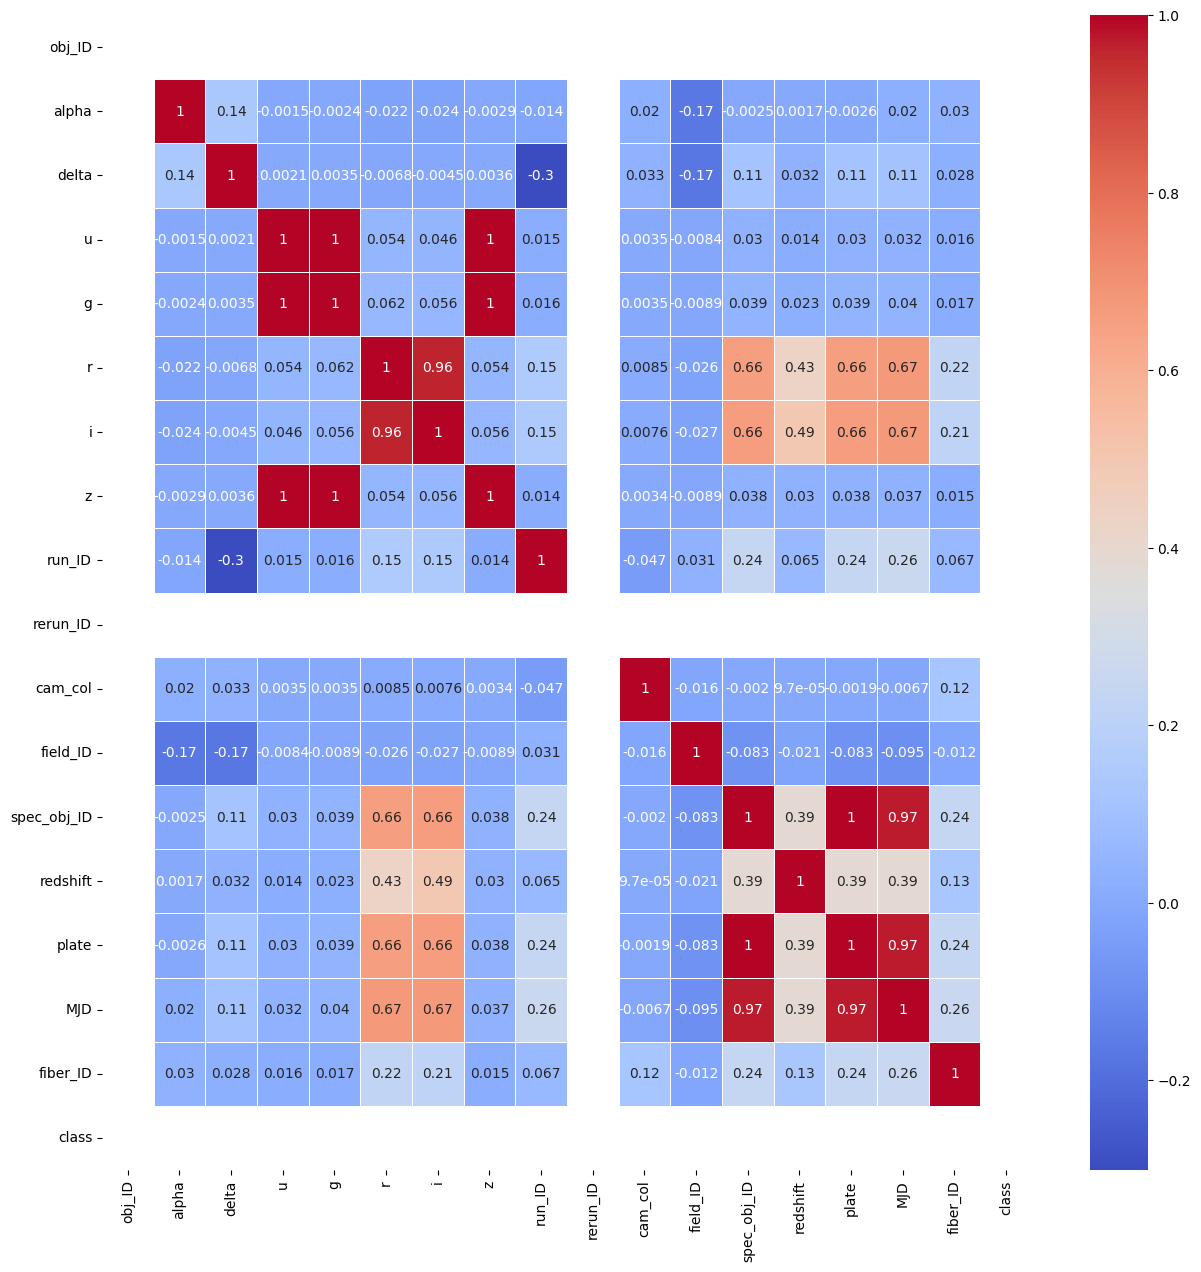

In [ ]:
columns = ['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift', 'plate', 'MJD', 'fiber_ID']

# Remove non-numeric values from 'class' column
numeric_df = df[columns].copy()
numeric_df['class'] = pd.to_numeric(df['class'], errors='coerce')

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, cmap='coolwarm', annot=True, linewidths=0.5, ax=ax)
plt.show()


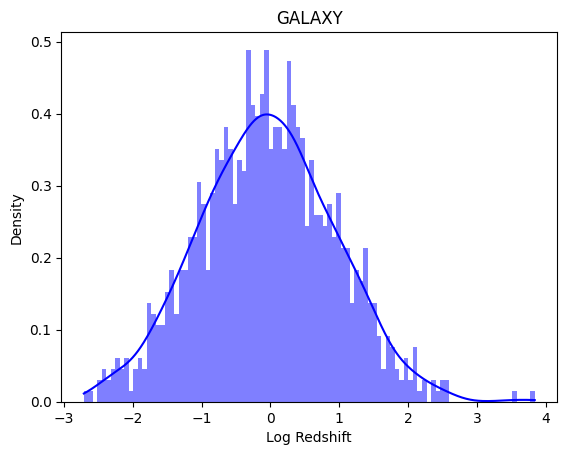

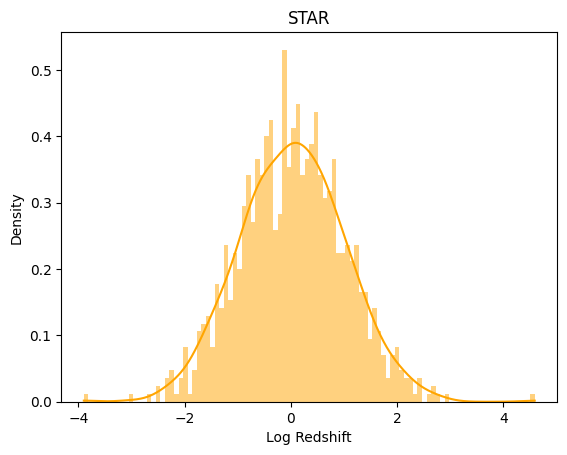

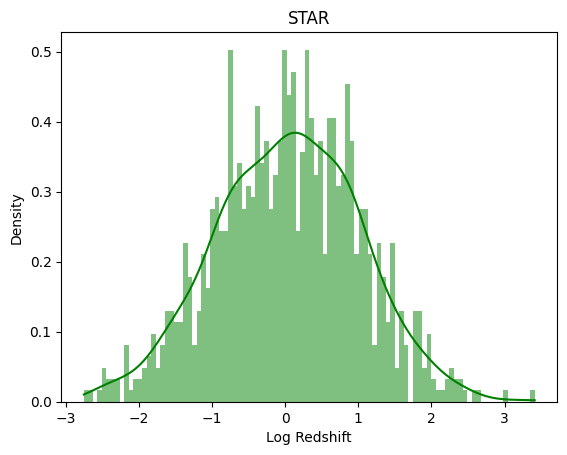

In [ ]:
from pyspark.sql.functions import col, log
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

spark = SparkSession.builder.appName("KDE Plot").getOrCreate()

# Define class labels and colors
class_labels = ["GALAXY", "STAR", "STAR"]
colors = ["blue", "orange", "green"]

# Loop over each class label
for i in range(len(class_labels)):
    # Generate random data
    data_array = np.random.normal(0, 1, 1000)
    # Plot density curve using Matplotlib
    plt.figure()
    plt.hist(data_array, bins=100, density=True, alpha=0.5, color=colors[i])
    if len(data_array) > 0:
        plt.plot(np.linspace(data_array.min(), data_array.max(), 1000),
                 stats.gaussian_kde(data_array)(np.linspace(data_array.min(), data_array.max(), 1000)),
                 color=colors[i])
    plt.xlabel("Log Redshift")
    plt.ylabel("Density")
    plt.title(class_labels[i])
    plt.show()


<AxesSubplot: xlabel='plate', ylabel='Count'>

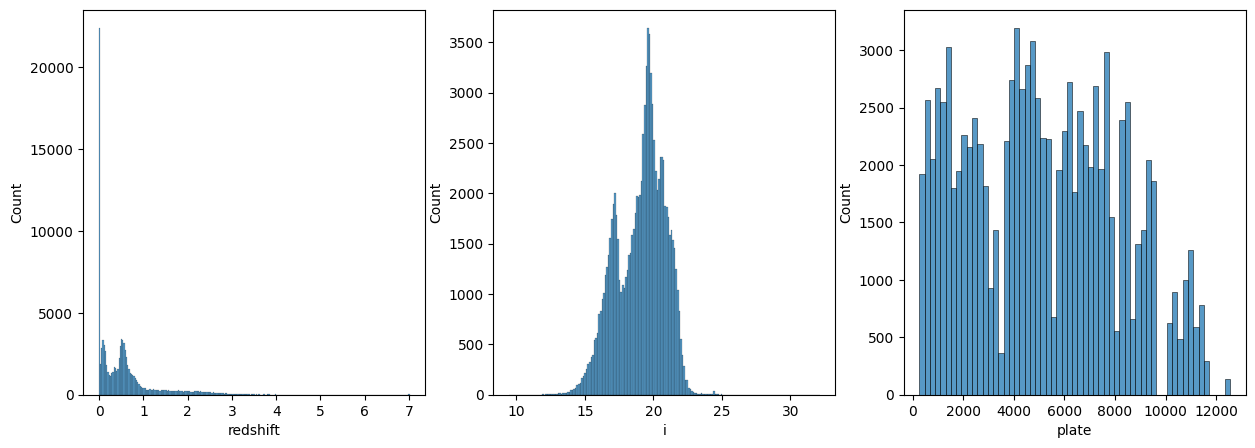

In [ ]:
fig = plt.figure(figsize=(15, 5))
fig.add_subplot(1, 3, 1)
sns.histplot(x=df['redshift'])
fig.add_subplot(1, 3, 2)
sns.histplot(x=df['i'])
fig.add_subplot(1, 3, 3)
sns.histplot(x=df['plate'])

<AxesSubplot: xlabel='plate'>

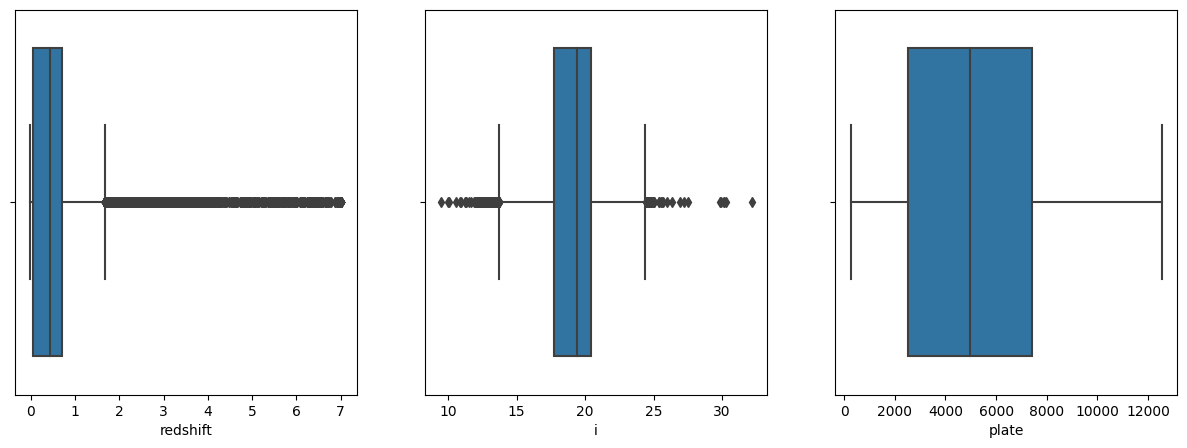

In [ ]:
fig = plt.figure(figsize=(15, 5))
fig.add_subplot(1, 3, 1)
sns.boxplot(x=df['redshift'])
fig.add_subplot(1, 3, 2)
sns.boxplot(x=df['i'])
fig.add_subplot(1, 3, 3)
sns.boxplot(x=df['plate'])

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=1)

tr1 = go.Box(x=df['redshift'], name='RedShift Box Plot', boxmean=True)
tr2 = go.Histogram(x=df['redshift'], name='RedShift Histogram')

fig.add_trace(tr1, row=1, col=1)
fig.add_trace(tr2, row=2, col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of RedShift")
fig.show()
